In [434]:
%load_ext autoreload
%autoreload 2
# Import packages

import json, string

import folium
import requests
import geocoder
import pandas as pd

from folium import Map, Marker, GeoJson, LayerControl

%matplotlib inline

from src import map_selector as ms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [502]:
location = [test.location[0], test.location[1]]
location_str = str(location)

<[OK] Osm - Geocode [465, East 3rd Street, Center, Saguache County, Colorado, 81125, United States of America]>

In [486]:
test = ms.render_map(aerial=False)

In [487]:
test

In [489]:
test.location

[37.7537286, -106.1078815]

In [492]:
test.location

[37.7537286, -106.1078815]

In [457]:
if type(location) == str:
    print('yes')
elif type(location)== list:
    print(type(location))

<class 'list'>


In [483]:
ss.capture_map()

/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [360]:
location = 'Center, Co'
loc = geocoder.osm(location)

In [468]:
sm

list

In [508]:
m=folium.Map(test.location
            , zoom_start=2, max_zoom=40,
             zoom_control = False,
             tiles="Stamen Toner"
            )
m.save('map.html')
m

In [383]:
m = folium.Map(location=[loc.lat, loc.lng],
       zoom_start=18, max_zoom=40,
       tiles= 'https://api.mapbox.com/styles/v1/butlerbt/ck6h2wkc107jz1io8zgoqee80/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiYnV0bGVyYnQiLCJhIjoiY2s2aDJqNzl2MDBqdDNqbWlzdWFqYjZnOCJ9.L4RJNdK2aqr6kHcHZxksXw',
       attr='Map data &copy; <a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors, <a href="https://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, Imagery © <a href="https://www.mapbox.com/">Mapbox</a>')
m.save('map.html')
m


In [385]:
import selenium.webdriver
# from phantomjs import Phantom
driver = selenium.webdriver.PhantomJS('phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(512, 512)  # choose a resolution
driver.get('map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('screenshot.png')

True

In [331]:
import src.inference as inf

In [377]:


import pickle
from fastai.vision import *
from fastai.callbacks import *
from skimage import io
from fastai.utils.collect_env import *
import torch 
from app import app
import matplotlib



def import_model():
    import src.inference_classes as inference_classes
    inference_learner = load_learner(
        path='src/', 
        file='single_chan_dice.pkl')
    return inference_learner



def prep_input(input_img):
    read_img = io.imread(input_img)
    t_img = Image(pil2tensor(read_img[:,:,:3],np.float32).div_(255))
    return t_img


def inference_masker(model, t_img):
    outputs = model.predict(t_img)
    inference_mask = image2np(outputs[2])
    inference_mask = (inference_mask*255).astype('uint8')
    inference_mask.flatten()
    return inference_mask

def visualize_inference(inference_mask, input_img):
    
    fig, ax= plt.subplots(1,1, figsize=(5,5))
    ax.imshow(inference_mask[:,:,0], alpha=1)
    ax.axis('off')
    plt.savefig('static/mask.png', dpi = 500, pad_inches = 0)

    fig2, ax2= plt.subplots(1,1, figsize=(5,5))
    ax2.imshow(io.imread(input_img))
    ax2.axis('off')
    plt.set_cmap('RdBu')
    plt.savefig('static/img.png')


    
def make_prediction(input_image):
    learner = import_model()
    tens_img = prep_input(input_image)
    mask = inference_masker(learner, tens_img)
    visualize_inference(inference_mask=mask, input_img=input_image)
    


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlo

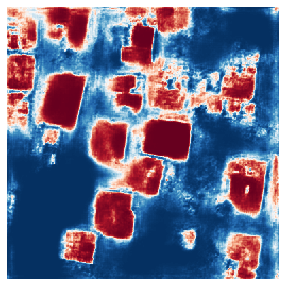

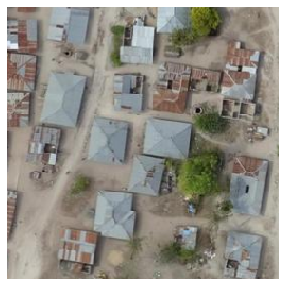

In [390]:
make_prediction('https://tiles.openaerialmap.org/5b1009f22b6a08001185f24a/0/5b1009f22b6a08001185f24b/19/319454/270706.png')

In [379]:
model = learner
outputs = model.predict(tens_img)
# pred_arr = np.array((preds[i][0].flatten()<0.5).int().reshape(256, 256)) # Thresh to play with
inference_mask = image2np(outputs[2]<.5)
inference_mask = (inference_mask*255).astype('uint8')



In [380]:
inference_mask[:,:,0]


array([[  0,   0,   0,   0, ..., 255, 255,   0,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       ...,
       [  0,   0, 255, 255, ...,   0, 255,   0,   0],
       [  0,   0, 255, 255, ..., 255,   0,   0,   0],
       [  0, 255, 255, 255, ..., 255, 255,   0,   0],
       [255, 255, 255, 255, ..., 255, 255,   0,   0]], dtype=uint8)

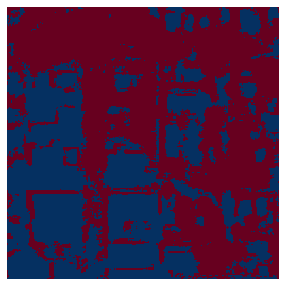

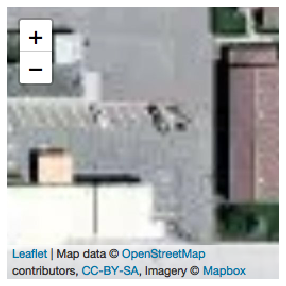

In [381]:
visualize_inference(inference_mask=inference_mask, input_img=input_image)

In [397]:
input_image='screenshot.png'
learn = import_model()
tens_img = prep_input('screenshot.png')
mask = inference_masker(learner, tens_img)
visualize_inference(inference_mask=mask, input_img=input_image)

/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlo

FileNotFoundError: No such file: '/Users/brentsair/Documents/Flatiron_School.nosync/mod5/seg_build_flask/screenshot.png'

In [398]:
inference_mask[:,:,0]

array([[  0,   0,   0,   0, ..., 255, 255,   0,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       [  0,   0,   0,   0, ..., 255, 255, 255,   0],
       ...,
       [  0,   0, 255, 255, ...,   0, 255,   0,   0],
       [  0,   0, 255, 255, ..., 255,   0,   0,   0],
       [  0, 255, 255, 255, ..., 255, 255,   0,   0],
       [255, 255, 255, 255, ..., 255, 255,   0,   0]], dtype=uint8)

In [394]:

geoms = sol.vector.mask.mask_to_poly_geojson(inference_mask[:,:,0], min_area = 20, simplify=True, )

In [395]:
geoms

,geometry,value
0,"POLYGON ((133.000 0.000, 133.000 2.000, 135.00...",255.0
1,"POLYGON ((187.000 8.000, 187.000 9.000, 184.00...",255.0
2,"POLYGON ((202.000 0.000, 202.000 4.000, 201.00...",255.0
3,"POLYGON ((248.000 0.000, 248.000 2.000, 246.00...",255.0
4,"POLYGON ((12.000 0.000, 12.000 3.000, 10.000 3...",255.0
5,"POLYGON ((152.000 0.000, 152.000 1.000, 150.00...",255.0
6,"POLYGON ((171.000 7.000, 171.000 8.000, 170.00...",255.0
7,"POLYGON ((222.000 2.000, 222.000 3.000, 219.00...",255.0
8,"POLYGON ((2.000 34.000, 2.000 36.000, 4.000 37...",255.0
9,"POLYGON ((236.000 44.000, 236.000 46.000, 232....",255.0


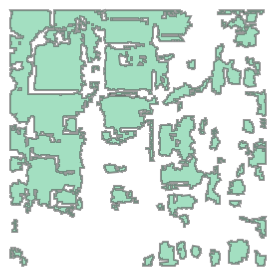

In [396]:
from shapely.ops import cascaded_union
cascaded_union(geoms['geometry'])

In [372]:
from skimage import io
import time

def get_pred(learner, tile):
#     pdb.set_trace()

    t_img = Image(pil2tensor(tile[:,:,:3],np.float32).div_(255))
    outputs = learner.predict(t_img)
    im = image2np(outputs[2].sigmoid())
    im = (im*255).astype('uint8')
    return im

/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlo

screenshot.png


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


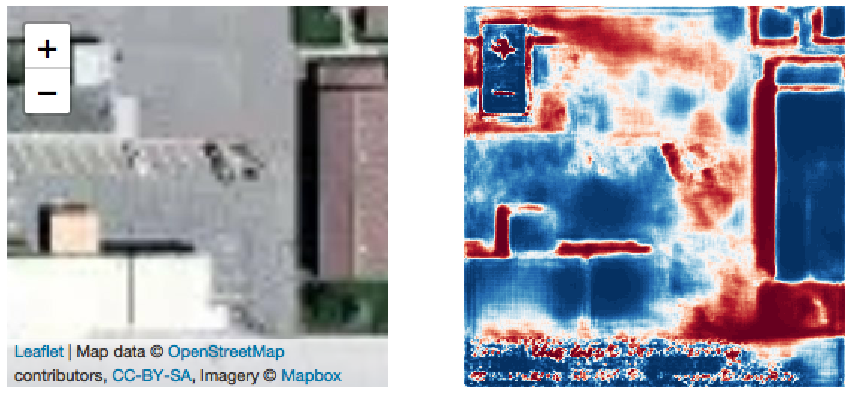

In [382]:
inference_learner = inf.import_model()
url = 'screenshot.png'
test_tile = io.imread(url)
result = get_pred(inference_learner, test_tile)


print(url)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(test_tile)
ax2.imshow(result[:,:,1])
ax1.axis('off')
ax2.axis('off')
plt.show()



In [387]:
# try a different tile by changing or adding your own urls to list

urls = [
  'https://tiles.openaerialmap.org/5b1009f22b6a08001185f24a/0/5b1009f22b6a08001185f24b/19/319454/270706.png',
  'https://tiles.openaerialmap.org/5b1e6fd42b6a08001185f7bf/0/5b1e6fd42b6a08001185f7c0/20/569034/537093.png',
  'https://tiles.openaerialmap.org/5beaaba463f9420005ef8db0/0/5beaaba463f9420005ef8db1/19/313479/283111.png',
  'https://tiles.openaerialmap.org/5d050c3673de290005853a91/0/5d050c3673de290005853a92/18/203079/117283.png',
  'https://tiles.openaerialmap.org/5c88ff77225fc20007ab4e26/0/5c88ff77225fc20007ab4e27/21/1035771/1013136.png',
  'https://tiles.openaerialmap.org/5d30bac2e757aa0005951652/0/5d30bac2e757aa0005951653/19/136700/197574.png'
]

https://tiles.openaerialmap.org/5b1009f22b6a08001185f24a/0/5b1009f22b6a08001185f24b/19/319454/270706.png
GPU inference took 2.04 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


https://tiles.openaerialmap.org/5b1e6fd42b6a08001185f7bf/0/5b1e6fd42b6a08001185f7c0/20/569034/537093.png
GPU inference took 1.92 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


https://tiles.openaerialmap.org/5beaaba463f9420005ef8db0/0/5beaaba463f9420005ef8db1/19/313479/283111.png
GPU inference took 2.55 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


https://tiles.openaerialmap.org/5d050c3673de290005853a91/0/5d050c3673de290005853a92/18/203079/117283.png
GPU inference took 11.11 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


https://tiles.openaerialmap.org/5c88ff77225fc20007ab4e26/0/5c88ff77225fc20007ab4e27/21/1035771/1013136.png
GPU inference took 2.01 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


https://tiles.openaerialmap.org/5d30bac2e757aa0005951652/0/5d30bac2e757aa0005951653/19/136700/197574.png
GPU inference took 1.96 secs


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


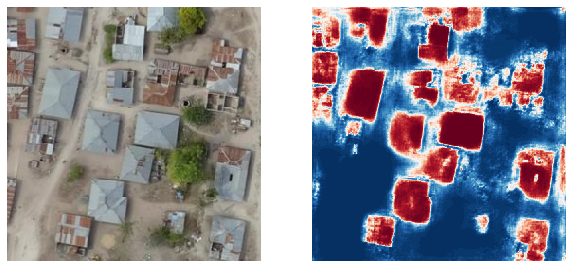

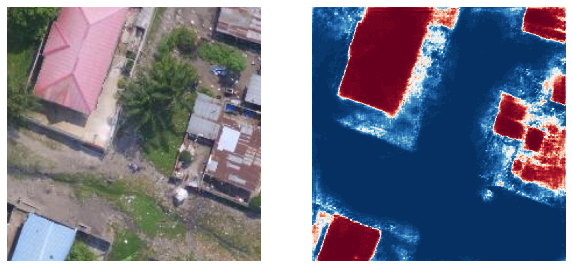

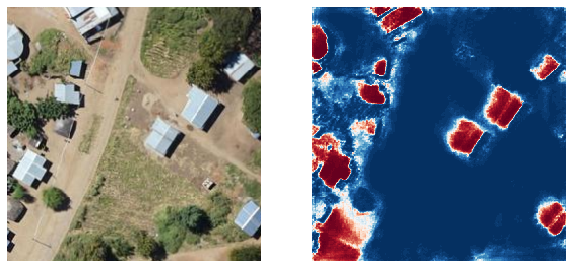

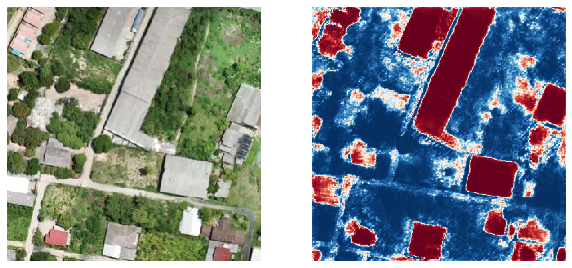

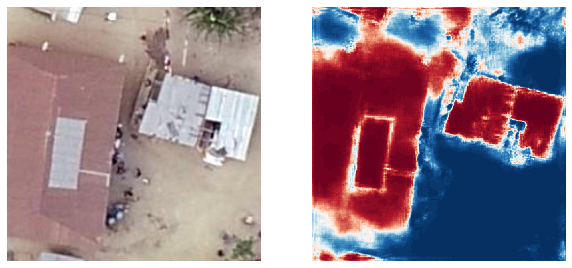

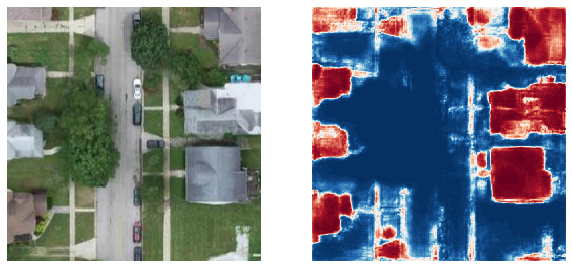

In [392]:
for url in urls:
    t1 = time.time()
    test_tile = io.imread(url)
    result = get_pred(inference_learner, test_tile)
    t2 = time.time()

    print(url)
    print(f'GPU inference took {t2-t1:.2f} secs')
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.imshow(test_tile)
    ax2.imshow(result[:,:,0])
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    
    geoms = sol.vector.mask.mask_to_poly_geojson(result[:,:,0], min_area = 20, simplify=True, )
    
    cascaded_union(geoms['geometry'])
    



,geometry,value
0,"POLYGON ((0.000 0.000, 0.000 256.000, 256.000 ...",255.0
